In [35]:
import sys
import numpy as np
import logging
import warnings
import tqdm
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')

import matplotlib.pyplot as plt
import seaborn
import astropy.table as table
import astropy.units as u

import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables
import snelib19odp.dataset as dataset
import snelib19odp.tigerfit as tigerfit
import snelib19odp.utils as utils

model = np.vectorize(tigerfit.Lum_rad)

In [2]:
ds19odp = dataset.load_dataset('SN2019odp_phot_short')
ds13bvn = dataset.load_dataset('iPTF13bvn')
ds08d = dataset.load_dataset('SN2008D')
ds98bw = dataset.load_dataset('SN1998bw')

../lib/snelib19odp/dataset.py:483: RuntimeWarning: invalid value encountered in log10
  ds['mag'] = -2.5*np.log10(ds['ampl']) + ds['magzp']


       mjd         band   mag   mag_err  maglim telescope instrument
------------------ ---- ------- ------- ------- --------- ----------
58718.171532724984 UVW1 21.1707  0.3498 21.2422     Swift       UVOT
 58718.17296719598    U 20.4926  0.3356 20.6174     Swift       UVOT
58718.173944388516    B 18.9096  0.1832 19.9058     Swift       UVOT
 58718.17632610677 UVW2 22.8054  0.5947 22.0495     Swift       UVOT
 58718.17869199114    V 18.5903  0.2777  18.981     Swift       UVOT
 58718.18644587137 UVM2 22.4146  0.2873 22.7858     Swift       UVOT
58719.476249458734 UVW1 21.2914  0.2713 21.7586     Swift       UVOT
 58719.47768546175    U 20.6638  0.2699  21.086     Swift       UVOT
58719.478660993744    B 18.7056  0.1176 20.3376     Swift       UVOT
 58719.48103849823 UVW2 22.2051  0.3022 22.5072     Swift       UVOT
               ...  ...     ...     ...     ...       ...        ...
 58721.96560227778    U 19.6001  0.1871 20.6589     Swift       UVOT
 58721.96663642116    B 18.0553  0

In [7]:
def plot_results(ds, r, time_range):
    plt.figure(figsize=(11,8))
    t_grid = np.linspace(ds.first_detection_mjd+time_range[0], ds.first_detection_mjd+time_range[1], 100)
    
    for i in range(10):
        lc = ds.sample_abs_lc(method='lyman', t_grid=t_grid)
        lums = utils.convert_luminosity(lc)
        plt.plot(t_grid - ds.transient.prior_t0, lums, label='Observed', color='tab:purple', alpha=0.3)
    for i in np.random.randint(0, 300, size=20):
        t = np.linspace(1e-3, time_range[1], 100)
        lc = model(t, *r[i].params)
        plt.plot(t+r[i].texpl-ds.transient.prior_t0, np.exp(lc), color='tab:orange', alpha=0.1)
        
        
def plot_residuals(r):
    for i in np.random.randint(0, 300, size=90):
        plt.plot(r[i].t, np.exp(r[i].residual), color='tab:orange', alpha=0.1)

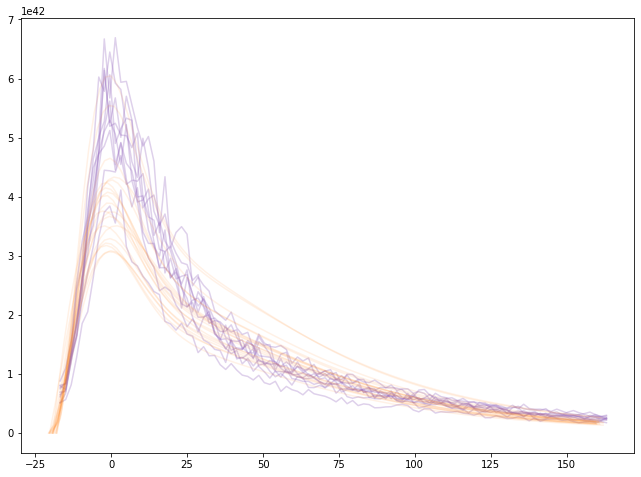

In [49]:
params19odp = {
    'texpl': ('samples', np.linspace(ds19odp.first_detection_mjd-4, ds19odp.first_detection_mjd-1, 300)),
    'vej': ('uniform', 11e3, 12e3)
}
time_range = (0, 180)
fit19odp, results = tigerfit.sample(ds19odp, params19odp, return_results=True, time_range=time_range)
plot_results(ds19odp, results, time_range=time_range)
#plot_residuals(results)

In [50]:
#print(ds13bvn.first_detection_mjd)
params13bvn = {
    #'texpl': ('samples', np.linspace(ds13bvn.first_detection_mjd-4, ds13bvn.first_detection_mjd-1, 300)),
    'texpl': ('samples', np.random.uniform(56458-1, 56459, size=300)),
    'vej': ('uniform', 6000, 9000)
}
time_range = (5, 180)
fit13bvn, results = tigerfit.sample(ds13bvn, params13bvn, return_results=True, time_range=time_range)
plot_results(ds13bvn, results, time_range=time_range)
#plot_residuals(results)

SyntaxError: invalid syntax (<ipython-input-50-836646496165>, line 5)

/usr/lib/python3/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


54475.40567


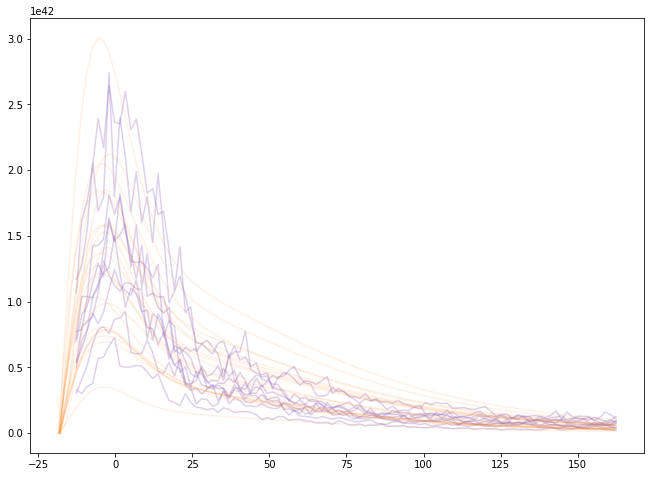

In [11]:
print(ds08d.first_detection_mjd)
params08d = {
    'texpl': ('samples', np.linspace(54474.5, ds08d.first_detection_mjd, 300))
}
time_range = (5, 180)
fit08d, results = tigerfit.sample(ds08d, params08d, return_results=True, time_range=time_range)
plot_results(ds08d, results, time_range=time_range)
#plot_residuals(results)

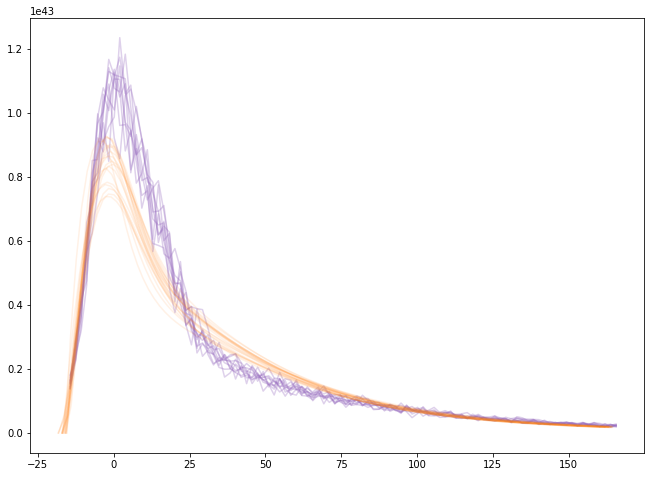

In [21]:
#print(ds13bvn.first_detection_mjd)
params98bw = {
    'texpl': ('samples', np.random.uniform(ds98bw.first_detection_mjd-4, ds98bw.first_detection_mjd-1, 300)),
    #'texpl': ('samples', np.random.uniform(56458-1, 56459, size=300))
    #'vej': ('uniform', 6000, 9000)
}
time_range = (0, 180)
fit98bw, results = tigerfit.sample(ds98bw, params98bw, return_results=True, time_range=time_range)
plot_results(ds98bw, results, time_range=time_range)
#plot_residuals(results)

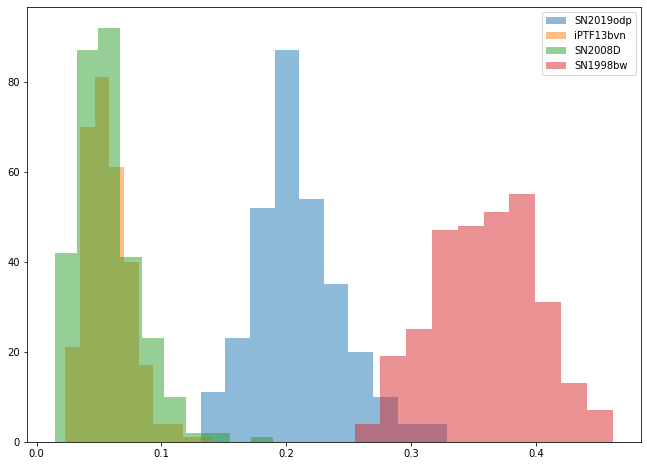

In [22]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['mni'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['mni'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['mni'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['mni'], label='SN1998bw', alpha=0.5)
plt.legend();

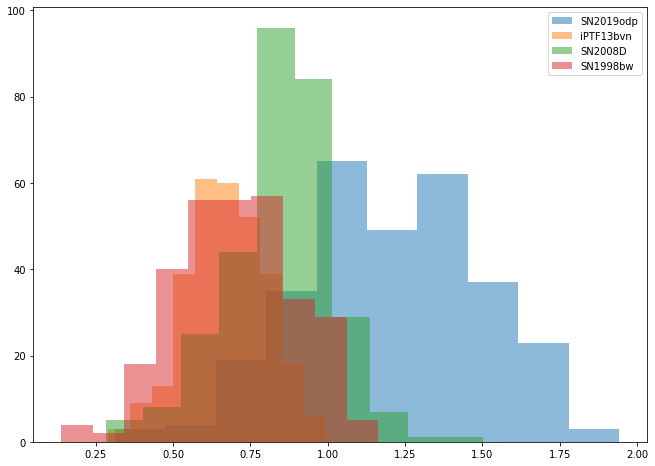

In [23]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['mejecta'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['mejecta'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['mejecta'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['mejecta'], label='SN1998bw', alpha=0.5)
plt.legend();

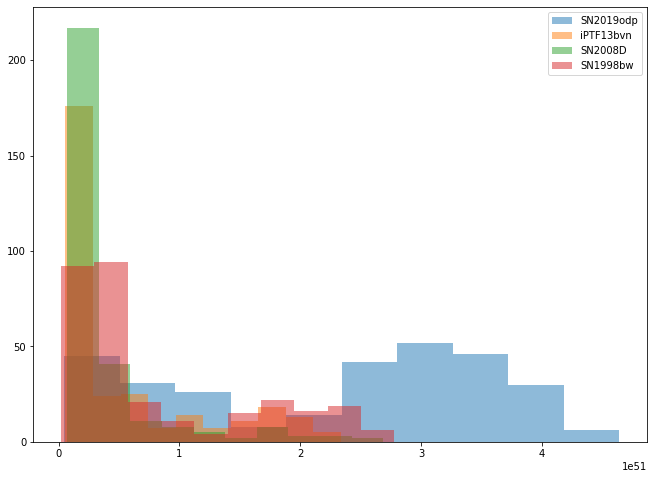

In [24]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['energy'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['energy'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['energy'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['energy'], label='SN1998bw', alpha=0.5)
plt.legend();

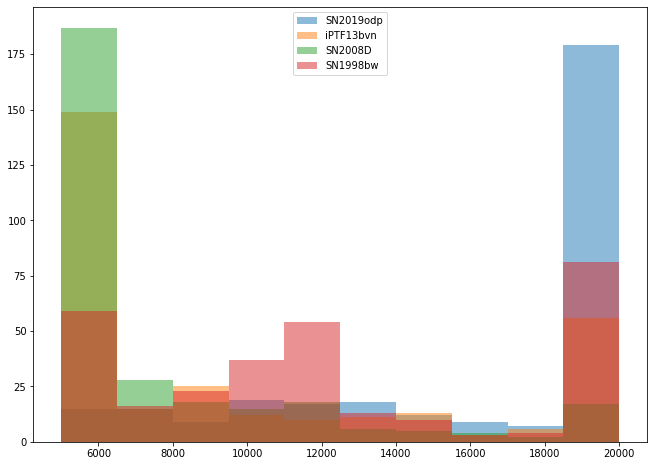

In [25]:
plt.figure(figsize=(11,8))
plt.hist(fit19odp['vejecta'], label='SN2019odp', alpha=0.5);
plt.hist(fit13bvn['vejecta'], label='iPTF13bvn', alpha=0.5)
plt.hist(fit08d['vejecta'], label='SN2008D', alpha=0.5)
plt.hist(fit98bw['vejecta'], label='SN1998bw', alpha=0.5)
plt.legend();

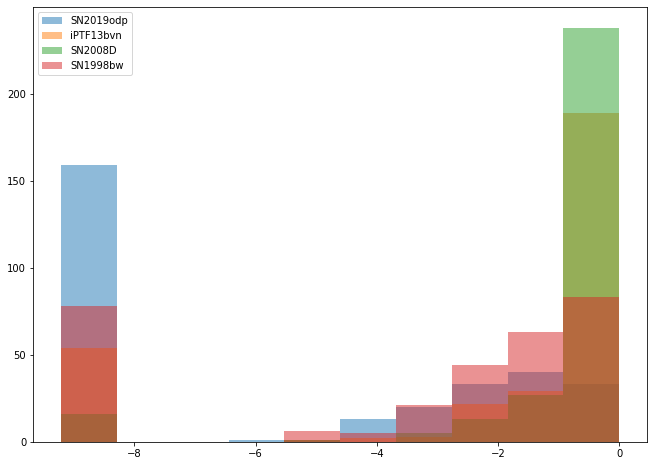

In [26]:
plt.figure(figsize=(11,8))
plt.hist(np.log(fit19odp['r0']), label='SN2019odp', alpha=0.5);
plt.hist(np.log(fit13bvn['r0']), label='iPTF13bvn', alpha=0.5)
plt.hist(np.log(fit08d['r0']), label='SN2008D', alpha=0.5)
plt.hist(np.log(fit98bw['r0']), label='SN1998bw', alpha=0.5)
plt.legend();

In [45]:
# estimate plateau lum of 19odp
np.median(7e40*(fit19odp['energy']/1e51)**0.85 / fit19odp['mejecta'] ** 0.67 * 2.8 ** 0.78 )

3.3144074663474407e+41

In [48]:
lc = ds19odp.sample_abs_lc(method='lyman', t_grid=np.ones(500)*ds19odp.first_detection_mjd)
lums = utils.convert_luminosity(lc)
print(np.median(lums))

7.28776084185685e+41


In [42]:
np.median(fit19odp['r0']*1e15*u.cm.to(u.solRad))

1.4374011848407575

In [38]:
1e15*u.cm.to(u.solRad)

14374.011786689665

In [39]:
u.solRad.to(u.cm)

69570000000.0

In [40]:
1e15 / 69570000000

14374.011786689665